In [1]:
import random

In [2]:
# Load the list of possible words from the file
with open('Dataset/reduced_possible_words.txt', 'r') as file:
    possible_words = [line.strip() for line in file]

# Load the list of words for testing from the file
with open('Dataset/prev_words_chr.txt', 'r') as file:
    testing_set = [line.strip() for line in file]

In [3]:
# Define feedback symbols
MISS = "⬛"
MISPLACED = "🟨"
EXACT = "🟩"

In [4]:
# Function to evaluate a guess based on feedback
def evaluate_guess(secret_word, guess):
    guess_copy = guess
    feedback = []
    remaining_secret_letters = list(secret_word)
    # First, check exact matches (greens)
    for i, (g1, g2) in enumerate(zip(secret_word, guess_copy)):
        if g1 == g2:
            feedback.append("🟩")
            remaining_secret_letters.remove(g1)
            guess_copy = guess_copy[:i] + "🟩" + guess_copy[i+1:]
        else:
            feedback.append("⬛")
    feedback_str = "".join(feedback)
    # Then, check letters but not in location (yellows)
    for i, g2 in enumerate(guess_copy):
        if g2 in remaining_secret_letters:
            feedback_str = feedback_str[:i] + "🟨" + feedback_str[i+1:]
            remaining_secret_letters.remove(g2)
    feedback = feedback_str
    return "".join(feedback)

In [5]:
# Function to generate a random word from the list of possible words
def choose_random_word(list):
    word = random.choice(possible_words)
    while word in list: word = random.choice(possible_words)
    return word

In [6]:
# Bayesian algorithm for word selection
def bayesian_choose_word(possible_words, previous_guesses):
    scores = {word: 0 for word in possible_words}
    for word in possible_words:
        for guess, feedback in previous_guesses:
            guess_feedback = evaluate_guess(word, guess)
            if guess_feedback == feedback:
                scores[word] += 1
    best_words = [word for word, score in scores.items() if score == max(scores.values())]
    return random.choice(best_words)

In [7]:
# Training phase
training_set_size = 1000  # Adjust as needed
training_set = []
training_set = [choose_random_word(training_set) for _ in range(training_set_size)]
training_attempts = []

great_starting_word = []
great_starting_word_attempts = float('inf')

word = 0
the_word = None

for target_word in training_set:
    attempts = 0
    previous_guesses = []
    word += 1
    print(f"word #{word}: {target_word}")
    
    while True:
        attempts += 1
        guess = bayesian_choose_word(possible_words, previous_guesses)
        
        if attempts == 1:
            the_word = guess
        # elif attempts == 2:
        #     the_word = guess
        
        feedback = evaluate_guess(target_word, guess)
        previous_guesses.append((guess, feedback))
        if target_word == guess:
            print(f"attempt: {attempts}")
            training_attempts.append(attempts)
            
            if attempts < 3:
                great_starting_word.append(the_word)
                # great_starting_word_attempts = attempts
            break

word #1: repel
attempt: 4
word #2: image
attempt: 3
word #3: spade
attempt: 5
word #4: ample
attempt: 4
word #5: yield
attempt: 5
word #6: nymph
attempt: 2
word #7: vapid
attempt: 5
word #8: needy
attempt: 4
word #9: inane
attempt: 5
word #10: shake
attempt: 5
word #11: delta
attempt: 5
word #12: knife
attempt: 3
word #13: sixth
attempt: 4
word #14: where
attempt: 4
word #15: bribe
attempt: 5
word #16: idiom
attempt: 4
word #17: stove
attempt: 5
word #18: crumb
attempt: 5
word #19: humor
attempt: 3
word #20: smash
attempt: 4
word #21: dozen
attempt: 5
word #22: swoon
attempt: 4
word #23: obese
attempt: 5
word #24: hyper
attempt: 4
word #25: maker
attempt: 3
word #26: throw
attempt: 4
word #27: fetid
attempt: 5
word #28: train
attempt: 4
word #29: duchy
attempt: 5
word #30: rowdy
attempt: 3
word #31: quoth
attempt: 3
word #32: hotly
attempt: 6
word #33: tweed
attempt: 4
word #34: lucid
attempt: 5
word #35: limit
attempt: 4
word #36: music
attempt: 4
word #37: modal
attempt: 4
word #38: 

In [8]:
from collections import Counter
top_ten_words = []
word_count = 0

def load_letter_frequencies(csv_path):
    letter_frequencies = {}
    with open(csv_path, 'r') as csvfile:
        next(csvfile)
        for row in csvfile:
            letter, frequency = row.strip().split(',')
            letter_frequencies[letter.lower()] = float(frequency)
    return letter_frequencies

def evaluate_word(word, letter_frequencies, repeat_penalty=0.5):
    # Calculate the frequency of each letter in the given word
    word_frequencies = Counter(word.lower())
    
    # Calculate the score for the word based on letter frequencies
    score = 0
    for letter in word_frequencies:
        score += letter_frequencies[letter] * word_frequencies[letter]
        
        # Apply penalty for repeated letters
        if word_frequencies[letter] > 1:
            score -= repeat_penalty * (word_frequencies[letter] - 1) * letter_frequencies[letter]
    return score

english_letter_frequencies = load_letter_frequencies('Dataset/letter_frequency.csv')

scores = {word: evaluate_word(word, english_letter_frequencies) for word in great_starting_word}
# best_word = max(scores, key=scores.get)

# Sort the words based on their scores in descending order
sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)

# Display the results
print("Word Scores (Descending Order):")
for word, score in sorted_words:
    print(f"{word}: {score}")
    word_count+=1
    if word_count<=10:
        top_ten_words.append(word)

# print("\nBest Word for the First Word in Wordle:")
# print(sorted_words[0][0])

Word Scores (Descending Order):
lathe: 40.044
haute: 38.776999999999994
rinse: 38.730999999999995
agent: 38.689
house: 35.388
sinew: 35.104
deity: 34.95099999999999
denim: 33.076
alive: 32.838
tidal: 32.467
dress: 32.432500000000005
notch: 32.187999999999995
drain: 32.122
recap: 31.566999999999997
idiot: 31.265
stilt: 30.902
gayer: 30.845
gripe: 29.598999999999997
brief: 29.375
sixth: 28.692999999999998
molar: 28.092
grail: 27.160000000000004
brunt: 26.042
candy: 23.925
whisk: 23.519
cling: 22.537
slush: 22.367500000000003
thump: 22.242999999999995
pooch: 22.0655
silly: 21.3045
young: 21.003
smock: 20.794
caulk: 19.503999999999998
crock: 19.439
brick: 18.999
blimp: 16.818
fizzy: 11.279


In [20]:
# Testing phase
avg_attempts = []
testing_set_size =100  # Adjust as needed
testing_set = []
testing_set = [choose_random_word(testing_set) for _ in range(testing_set_size)]

for best_word in top_ten_words:
    testing_attempts = []
    word = 0
    the_word = None

    best_starting_word = []
    best_starting_word_attempts = float('inf')

    for target_word in testing_set:
        attempts = 0
        previous_guesses = []
        word += 1
        print(f"list #{top_ten_words.index(best_word)} word #{word}: {target_word}")

        while True:
            attempts += 1
            guess = bayesian_choose_word(possible_words, previous_guesses)
            
            if attempts == 1:
                guess = best_word
                the_word = guess
            # elif attempts == 2:
            #     the_word = guess
            
            feedback = evaluate_guess(target_word, guess)
            previous_guesses.append((guess, feedback))
            if target_word == guess:
                print(f"attempt: {attempts}")
                testing_attempts.append(attempts)
                if attempts < 3:
                    best_starting_word.append(the_word)
                    # best_starting_word_attempts = attempts
                break
    avg_testing_attempts = sum(testing_attempts) / len(testing_attempts)
    avg_attempts.append(avg_testing_attempts)

list #0 word #1: noise
attempt: 5
list #0 word #2: bleak
attempt: 2
list #0 word #3: grail
attempt: 5
list #0 word #4: phony
attempt: 4
list #0 word #5: mason
attempt: 3
list #0 word #6: noble
attempt: 4
list #0 word #7: pique
attempt: 4
list #0 word #8: retry
attempt: 4
list #0 word #9: cause
attempt: 4
list #0 word #10: tempo
attempt: 4
list #0 word #11: given
attempt: 3
list #0 word #12: smirk
attempt: 4
list #0 word #13: occur
attempt: 4
list #0 word #14: splat
attempt: 3
list #0 word #15: mercy
attempt: 4
list #0 word #16: adult
attempt: 3
list #0 word #17: graph
attempt: 4
list #0 word #18: leaky
attempt: 4
list #0 word #19: agent
attempt: 3
list #0 word #20: uncle
attempt: 4
list #0 word #21: knelt
attempt: 5
list #0 word #22: skunk
attempt: 5
list #0 word #23: snail
attempt: 3
list #0 word #24: truth
attempt: 2
list #0 word #25: binge
attempt: 3
list #0 word #26: viola
attempt: 4
list #0 word #27: chime
attempt: 3
list #0 word #28: bunch
attempt: 6
list #0 word #29: spurt
attem

In [21]:
best_word = top_ten_words[int(avg_attempts.index(min(avg_attempts)))]

print(f"best_word: {best_word}")
print(f"avg_attempt for best_word: {min(avg_attempts)}")

best_word: rinse
avg_attempt for best_word: 3.834101382488479


In [25]:
# Print average attempts for training and testing
avg_training_attempts = sum(training_attempts) / len(training_attempts)
avg_testing_attempts = sum(testing_attempts) / len(testing_attempts)

print(f"Average attempts during training: {avg_training_attempts:.2f}")
print(f"Average attempts during testing: {min(avg_attempts):.2f}")

Average attempts during training: 4.14
Average attempts during testing: 3.83


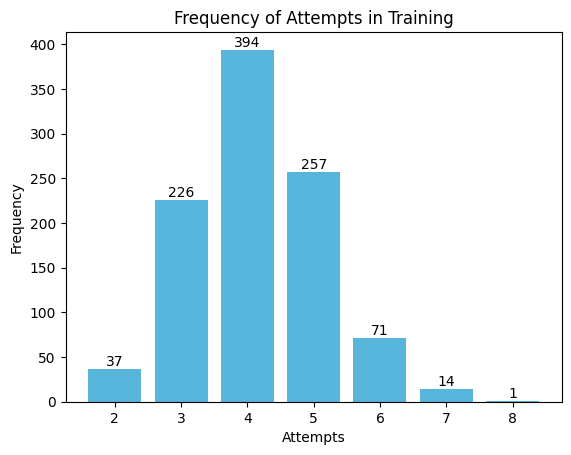

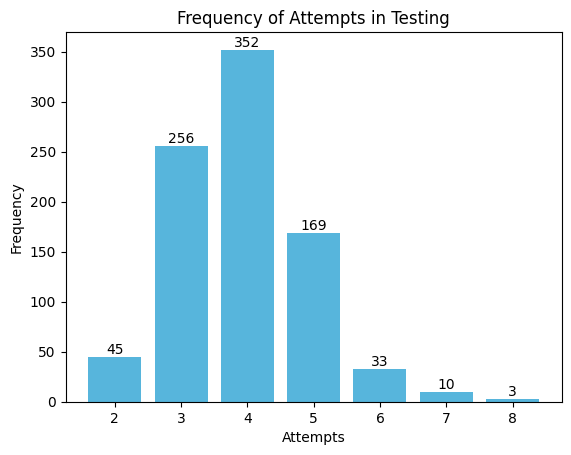

In [23]:
import matplotlib.pyplot as plt

unique_elements, counts = [], []

for item in set(training_attempts):
    unique_elements.append(item)
    counts.append(training_attempts.count(item))

# Create a bar graph
plt.bar(unique_elements, counts, color='#57b5dc')

# Add data labels
for i, count in enumerate(counts):
    plt.text(unique_elements[i], count + 0.1, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Attempts')
plt.ylabel('Frequency')
plt.title('Frequency of Attempts in Training')

# Show the plot
plt.show()

unique_elements, counts = [], []

for item in set(testing_attempts):
    unique_elements.append(item)
    counts.append(testing_attempts.count(item))

# Create a bar graph
plt.bar(unique_elements, counts, color='#57b5dc')

# Add data labels
for i, count in enumerate(counts):
    plt.text(unique_elements[i], count + 0.1, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Attempts')
plt.ylabel('Frequency')
plt.title('Frequency of Attempts in Testing')

# Show the plot
plt.show()

In [28]:
# Main game loop
attempts = 0
previous_guesses = []

print("Let's Play Wordle!")
print("Please think of a word and provide feedback as follows:")
print("0 for MISS, 1 for MISPLACED, and 2 for EXACT.")

while True:
    attempts += 1
    guess = bayesian_choose_word(possible_words, previous_guesses)
    
    # First step to set the first word
    if attempts == 1: guess = best_word
    
    feedback = []
    while True:
        try:
            feedback_input = input(f"Attempt {attempts}: {guess} - Enter feedback (0/1/2): ")
            feedback_input = [int(f) for f in feedback_input]
            if all(f in [0, 1, 2] for f in feedback_input) and len(feedback_input) == 5:
                for i in range(len(feedback_input)):
                    if feedback_input[i] == 0:
                        feedback.append("⬛")
                    elif feedback_input[i] == 1:
                        feedback.append("🟨")
                    elif feedback_input[i] == 2:
                        feedback.append("🟩")
            else:
                print("Invalid feedback. Please provide feedback as 0, 1, or 2.")
        except ValueError:
            print("Invalid feedback. Please provide feedback as 0, 1, or 2.")
        if len(feedback) == len(feedback_input):
            feedback = "".join(feedback)
            break
    previous_guesses.append((guess, feedback))
    print(feedback)

    if feedback.count("🟩") == 5:
        print(f"Congratulations! The word was '{guess}'. It took {attempts} attempts to guess.")
        break

Let's Play Wordle!
Please think of a word and provide feedback as follows:
0 for MISS, 1 for MISPLACED, and 2 for EXACT.
⬛🟩🟨⬛⬛
⬛🟩⬛🟨🟨
🟩🟩🟩🟩🟩
Congratulations! The word was 'piano'. It took 3 attempts to guess.
